<!-- # Project: Investigate a Dataset - No-Show appointments -->
<link href="https://cdn.jsdelivr.net/npm/bootstrap@5.3.3/dist/css/bootstrap.min.css" rel="stylesheet" integrity="sha384-QWTKZyjpPEjISv5WaRU9OFeRpok6YctnYmDr5pNlyT2bRjXh0JMhjY6hW+ALEwIH" crossorigin="anonymous">

<h1 class="text-bg text-center p-1">Project: Investigate a Dataset - No-Show appointments</h1>

<!-- ## Table of Contents -->
<h2 class="text-bg-primary p-2">Table of Contents</h2>
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='#intro'></a>
<h2 class="text-bg-primary p-2">Introduction</h2>


### A. Context:

This report aims to investigate why patients in Brazil not showing up for their appointment. In the conventional procedure, patients in Brazil request doctor appointments, which are promptly scheduled, and confirmation text messages containing appointment details is dispatch. The report also aims to inivestigate which neighbourhood has the highest attendance 

</br>

### B. Dataset Description:

The dataset contains about 110k medical appointments. and each row contains a number of characteristics about the patient as described in the below table.
</br>
<div class="row">
    <div class="col-lg-12">
        <table class="table">
            <thead>
                <tr>
                    <th scope="col">Header</th>
                    <th scope="col">Discription</th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td scope="row" width=200px>1. PatientId</td>
                    <td colspan="3">Unique identifier for each patient</td>
                </tr>
                <tr>
                    <td scope="row">2. AppointmentID</td>
                    <td colspan="3">Unique identifier for each appointment.</td>
                </tr>
                <tr>
                    <td scope="row">3. Gender</td>
                    <td colspan="3">Patient's gender (male or female).</td>
                </tr>
                <tr>
                    <td scope="row">4. ScheduledDay</td>
                    <td colspan="3">Date and time when the appointment was scheduled.</td>
                </tr>
                <tr>
                    <td scope="row">5. AppointmentDay</td>
                    <td colspan="2">Date of the actual appointment.</td>
                </tr>
                <tr>
                    <td scope="row">6. Age</td>
                    <td colspan="2">Patient's age</td>
                </tr>
                <tr>
                    <td scope="row">7. Neighbourhood</td>
                    <td colspan="2">Location or neighborhood where the medical facility is located.</td>
                </tr>
                <tr>
                    <td scope="row">8. Scholarship</td>
                    <td colspan="2">Indicates if the patient is enrolled in a scholarship program.</td>
                </tr>
                <tr>
                    <td scope="row">9. Hipertension</td>
                    <td colspan="2">Indicates if the patient has hypertension (high blood pressure).</td>
                </tr>
                <tr>
                    <td scope="row">10. Diabetes</td>
                    <td colspan="2">Indicates if the patient has diabetes.</td>
                </tr>
                <tr>
                    <td scope="row">11. Alcoholism</td>
                    <td colspan="2">Indicates if the patient is known to have issues with alcohol consumption.</td>
                </tr>
                <tr>
                    <td scope="row">12. Handcap</td>
                    <td colspan="2">Indicates the level of handicap (if any) the patient may have.</td>
                </tr>
                <tr>
                    <td scope="row">13. SMS_received</td>
                    <td colspan="2">Indicates whether the patient received an SMS reminder for the appointment.</td>
                </tr>
                <tr>
                    <td scope="row">14. No-show</td>
                    <td colspan="2">Indicates whether the patient showed up for the appointment</td>
                </tr>
            </tbody>
        </table>
    </div>
</div>

### Question(s) for Analysis

I preapre 2 question below that need to be answr. This Question will help us in predicting for future appoitement

1. What factors contribute to patients not attending their scheduled appointments at the hospital?
2. Which neighbour has the highest attendance for a patient with hypertension?



Below import some of the libraries that will be used in this investigation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# A collection of constant variable for use in the program parameter.
from constants import color
# % matplotlib inline

<a id='wrangling'></a>
<h2 class="text-bg-primary p-2">Data Wrangling</h2>

In this section, I'll leverage the Panda Library to read a CSV file. The returned object will contain DataFrame data. Then, store data in a variable named 'df', enabling us to conduct data analysis processes seamlessly.

In [2]:
# Reading CSV File
df = pd.read_csv('Data/noshowappointments-kagglev2-may-2016.csv')

will use the Head() method this will allow us to see 5 first rows of the data to have an idea of how to data looks like, and what type of valus expected to retrun

In [3]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)

# Retrun the first 5 row of the DataFrame data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


To have an idea of how many rows and columns will untlise .shape

In [4]:
df.shape

(110527, 14)

This section will have an overview of any missing values or wrong data types, As noticed when performing .info() it shows no missing data. But noticed the data types of **'ScheduledDay' & 'AppointmentDay'** are not in the right format since they appear as **object data types**. To fix it will need to change it to "datetime" in the upcoming stage

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Here will invistigate overall data uisng .describe() that will provides with summary statistics for every numaric coulmn in the data table.
The table shows some unrealistic valu for exmple min age = -1 and handcap has the maximum of 4 when i was expecting 1 & 0 as True and Flase.
The table also show that 75% of patienet recved sms message for thier Appointment 

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527,110527,110527,110527,110527,110527,110527,110527,110527
mean,147496265710394,5675305,37,0,0,0,0,0,0
std,256094920291739,71296,23,0,0,0,0,0,0
min,39218,5030230,-1,0,0,0,0,0,0
25%,4172614444192,5640286,18,0,0,0,0,0,0
50%,31731838713978,5680573,37,0,0,0,0,0,0
75%,94391720898175,5725524,55,0,0,0,0,0,1
max,999981631772427,5790484,115,1,1,1,1,4,1


Investigating how many patient with age value of -1, however the results shows only one patient. In the later stage will will ingistiagte weather to drop or fill with postive value

In [7]:
df[df['Age'] == -1].head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,465943158731293,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


Investigiating if we have other valus assicated with "handcap". it truns out we got series of numbers.
Which i assume each number represents level of handcap

In [8]:
df['Handcap'].unique()

array([0, 1, 2, 3, 4])

Here will check if we dont have dublicate or repetitive rows which could effect when performing EDA

In [9]:
# Checking for dubpliate in for each row
df.duplicated().value_counts()

False    110527
Name: count, dtype: int64


### Data Cleaning

Before we process with data cleaning, will change the column header to a lower string, for easy referencing

In [10]:
# Create Dict and change it to lower case
lower_label = {each_label:each_label.lower() for each_label in df.columns}
# Renamae the column besed on the created new dict above (lower_label)
df.rename(columns=lower_label, inplace=True)

Column "No-Show" is creating confusion for the reader in this case will change it to absent to make it more realistic

In [11]:
df.rename(columns={'no-show': 'absent'}, inplace =True)

Check if column rename took place 

In [12]:
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'absent'],
      dtype='object')

In the Previous step, I investigate the negative value found in the 'Age' column. In this step will check if it is a typo though by checking the Patient's ID and any other appointments they have. Which could have a reference of the correct age and change it accordingly. if not then will will drop the row that contains negative value 


In [13]:
# Get Patient ID 
patient_id = df['patientid'][df['age'] == -1].values[0]

# Get All Appoitmenet associated with Patient ID
df[df['patientid'] == patient_id].head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,absent
99832,465943158731293,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


Since we only have one record, will drop the row to have clean data 

In [14]:
# Drop the row with nagative age value
index_value = df[df['patientid'] == patient_id].index[0]
df.drop(index=index_value, inplace=True)

# Check if the row is droped
df[df['patientid'] == patient_id].head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,absent


In previuse section it was observed that 'AppointmentDay' is not in the right format.
Thereore will conver it to datetime.
Will also add two column Day_of_Week and Day that will be used in the upcoming stage

In [15]:
# Convert AppointmentDay to Datetime so then we can create DAY_OF_WEEK, Day, Month 
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

# Create DAY_OF_WEEK Column
df['day_of_week'] = pd.to_datetime(df['appointmentday']).dt.day_name()

# Create Day Column
df['day'] = pd.to_datetime(df['appointmentday']).dt.day

In [16]:
# To check if the changes took place
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,absent,day_of_week,day
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,29
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,29
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,29
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,29
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,29


Will also drop the following column 'patientid', 'appointmentid', 'scheduledday', 'appointmentday' since will not beening using for EDA

In [17]:
df.drop(['patientid', 'appointmentid', 'scheduledday', 'appointmentday'], axis=1, inplace=True)

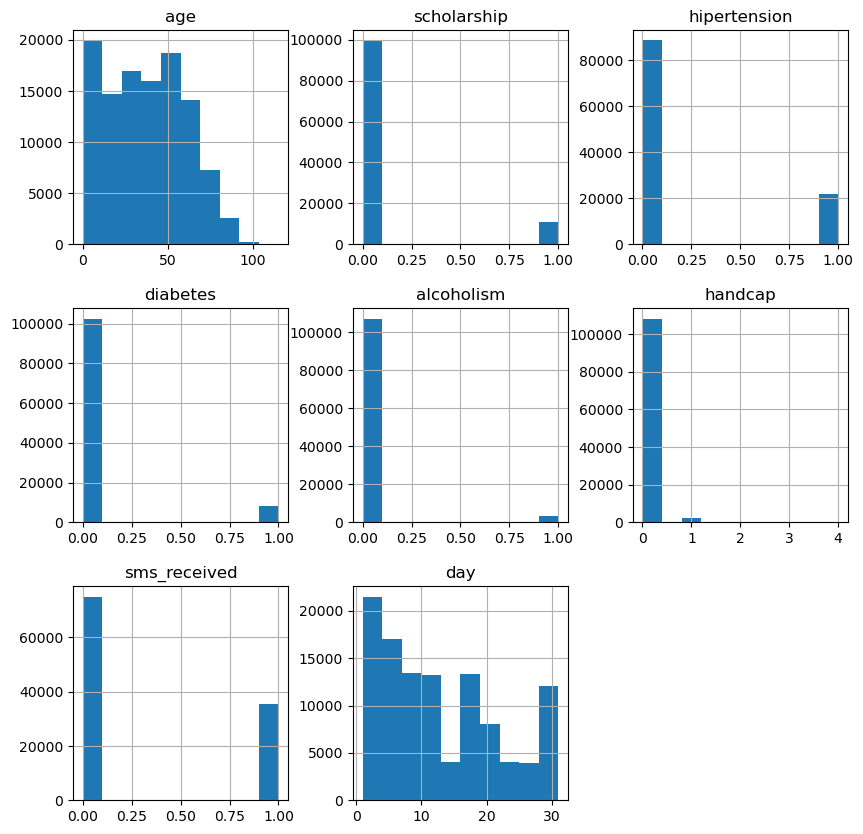

In [18]:
df.hist(figsize=(10, 10));

In this section, I will develop a function will  that create a plot chart to be used during this EDA

In [19]:
from typing import Literal
def display_plot(
    dataframe: pd.DataFrame,
    plot_type: Literal['hist', 'bar', 'scatter','plot', 'pie'] = 'hist',
    color: list = [color.BLUE],
    rotate:float = 0.0,
    fontsize:float = 10,
    combine: Literal[True, False] = True,
    title: str = None,
    legend: list = [],
    alpha: float = 1):
    """
    Create a Plot data based on the specified plot type.
    The x-axis represents the range of values provided by the data df.
    The y-axis represents the frequency of values (how often that variable appears).

    Args:
        dataframe (Panda DataFrame): The data df that is required for plotting.
        plot_type ('hist', 'bar', 'scatter', 'plot', 'pie): Type of plot such as histagram, bar, scatter defult('hist)
        color (list): Color of the plot.
        rotate (float): Rotation fo the x-axies label
        fontsize (float):Size of the x axies label
        combine (True, False): Combine all Plot in one ghraph.
        title (str): Title to be displayed on the plot.
        legend (list): Lable for Pie chat.
        alpha (float):

    Returns:
        Plot Ghraph
    """
    df = dataframe

    # Create Plot 
    if plot_type == 'hist':
        plt.hist(df, color=color[0], label=legend[0], alpha=alpha)

    if plot_type in ['bar', 'scatter', 'plot']:
        plot_func = plt.bar if plot_type == 'bar' else plt.scatter if plot_type == 'scatter' else plt.plot
        plot_func(dataframe.index, dataframe.values, color=color[0], label=legend[0], alpha=alpha);

    if plot_type == 'pie':
        plt.pie(dataframe.values, labels=legend, colors=color, autopct="%1.1f%%")
    
    # Add lable to X and Y axis 
    if plot_type != 'pie':
        # Replace the header label that contains _ with space
        xlabel = f'{dataframe.index.name.replace("_", " ")}' if "_" in dataframe.index.name else f'{dataframe.index.name}'
        # X-axis label
        plt.xlabel(xlabel.title())
        if rotate != 0.0:
            plt.xticks(rotation=rotate, fontsize=fontsize)
        # Replace the header label that contains _ with space
        ylabel = f'{dataframe.name.replace("_", " ")}' if "_" in dataframe.name else f'{dataframe.name}'
        # Y-axis label
        plt.ylabel(ylabel.title())
        # Add title on the top of the chart
        plt.title(title, loc='center')

    # Combine all the plot in one ghraph   
    if not combine:
        plt.show()
    else:
        plt.legend()


### Research Question 1 (What factors contribute to patients not attending their scheduled appointments at the hospital?)

Here a variable will be created that will be used as a filter during the investigation

In [20]:
sms_received = df.sms_received == 1 # Apply received SMS sorting filter
sms_not_received = df.sms_received == 0 # Apply not received SMS sorting filter
absent = df.absent == 'Yes' # Apply absent sorting filter
present = df.absent == 'No' # Apply present sorting filter

Using the filter and the fuction in the previous line, we can now generate a bar chat of Total Attendance and absence.
This will help us get an overview of whether there is an absence or not.
<br><br>
Below will create two bar chat:
<br>
1:  Create bar chat with the following flags absent='No'
<br>
2:  Create bar chat with the following flags absent='Yes'

'day'

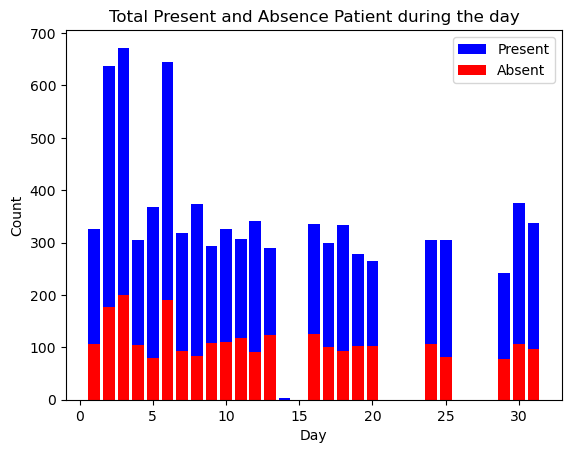

In [21]:
# Get all Patient with are on scholarship
scholarship = df.query('scholarship == 1')

# Create Title for the chart
title = "Total Present and Absence Patient during the day"
# Create bar chart of total present for all days
present_filter = scholarship.loc[present]
display_plot(present_filter.day.value_counts(), 'bar', color.BLUE, legend=["Present"], title=title)
# Create bar chart of total absence for all days
absent_filter = scholarship.loc[absent]
display_plot(absent_filter.day.value_counts(), 'bar',color.RED, legend=["Absent"], title=title)

present_filter.day.name

In [22]:
present_filter.day.value_counts().describe()

count    24
mean    345
std     138
min       3
25%     298
50%     322
75%     348
max     672
Name: count, dtype: float64

In [23]:
absent_filter.day.value_counts().describe()

count    23
mean    112
std      33
min      78
25%      93
50%     105
75%     114
max     199
Name: count, dtype: float64

As we can see from the previous graph, we noticed that there are present and absent patients, and the percentage of present patients is more than double that of those absent, as the mean is 345 compared to 112. 
<br><br>
Next stage will investigate further why some patients are absent and whether they received an SMS or not.
<br><br>
Below will create two bar chat:
<br>
1:  Create bar chat with the following flags absent='Yes', sms_received=1
<br>
2:  Create bar chat with the following flags absent='Yes', sms_received=0

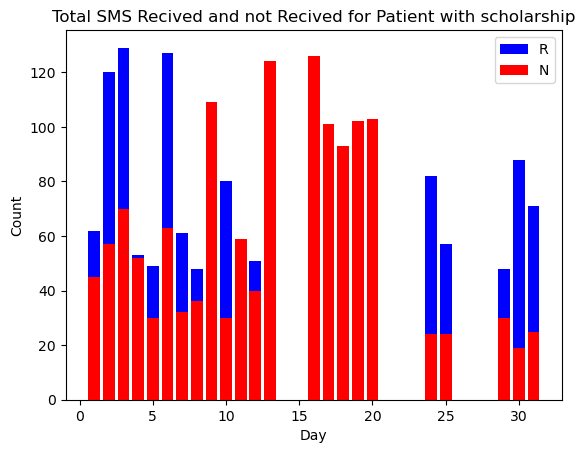

In [24]:
# Create Chart Title
title = "Total SMS Recived and not Recived for Patient with scholarship"
# Create bar chart of Total SMS Recived by appling sms_received=1
received = scholarship.loc[absent & sms_received]
display_plot(received.day.value_counts(), 'bar', color.BLUE, legend='Received', title=title)
# Create bar chart of Total SMS not Recived by appling sms_received=0
not_received = scholarship.loc[absent & sms_not_received]
display_plot(not_received.day.value_counts(), 'bar', color.RED,legend='Not Received',  title=title)


A pie chart to get an overview of the percentage of SMS messages received and not received

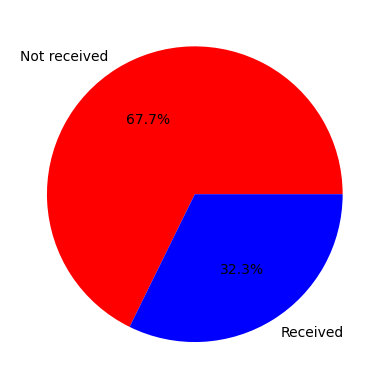

In [25]:
# Create color list to be used for Pie Chat
color_list = [color.RED, color.BLUE]
# Create legend list to be used for Pie Chat
legend = ['Not received', 'Received']
#Create Pie chat
display_plot(scholarship.sms_received.value_counts(), 'pie',color_list, legend=legend, combine=False)

In [26]:
received.day.value_counts().sort_index(ascending=True)

day
1      62
2     120
3     129
4      53
5      49
6     127
7      61
8      48
10     80
11     58
12     51
24     82
25     57
29     48
30     88
31     71
Name: count, dtype: int64

In [27]:
not_received.day.value_counts().sort_index(ascending=True)

day
1      45
2      57
3      70
4      52
5      30
6      63
7      32
8      36
9     109
10     30
11     59
12     40
13    124
16    126
17    101
18     93
19    102
20    103
24     24
25     24
29     30
30     19
31     25
Name: count, dtype: int64

In [28]:
neighbourhood_df = not_received.neighbourhood.value_counts().sort_values(ascending=False)
neighbourhood_df.head()

neighbourhood
CARATOÍRA           73
GURIGICA            71
ILHA DO PRÍNCIPE    63
ANDORINHAS          55
BONFIM              53
Name: count, dtype: int64

### Research Question 2 (Which neighbour has the highest attendance for patient with hipertension?)


Create Tabale with all hipertension Patient

In [29]:
hipertension = df.hipertension == 1

hipertension_df = df.loc[hipertension]

hipertension_df.head()

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,absent,day_of_week,day
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,29
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,29
5,F,76,REPÚBLICA,0,1,0,0,0,0,No,Friday,29
25,M,46,CONQUISTA,0,1,0,0,0,1,No,Friday,29
26,F,45,BENTO FERREIRA,0,1,0,0,0,0,No,Friday,29


Dsiaply Chart of pateient with hipertension and to have an onverview

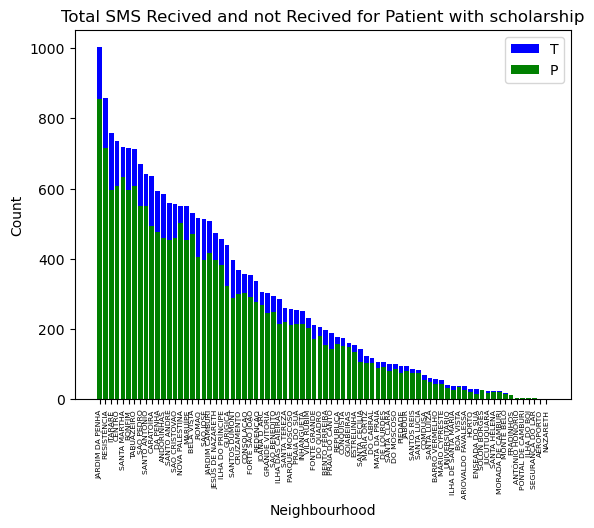

In [30]:
# Disaply Total Appoitement for patient with hipertension
display_plot(hipertension_df.neighbourhood.value_counts(), 'bar',color.BLUE, legend='Total Appointment')
# Apply fillter to get only present patienet
present_df = hipertension_df.loc[present]
# Disaply Total attandnace of patient with hipertension
display_plot(present_df.neighbourhood.value_counts(), 'bar',color.GREEN, legend='Present', title=title, rotate=90, fontsize=5.5)

We can see above that the most attended neighbourhood is "JARDIM DA PENHA"
<br>
Check the trend of patients attended against the total appointment

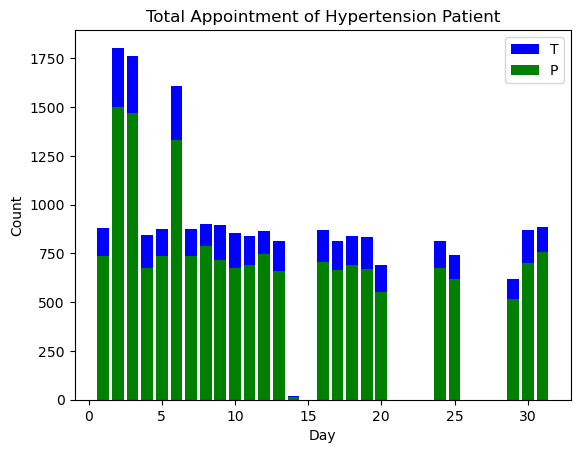

In [31]:
title = "Total Appointment of Hypertension Patient"

display_plot(hipertension_df.day.value_counts(), 'bar',color.BLUE, legend='Total Appointment')

display_plot(present_df.day.value_counts(), 'bar',color.GREEN, legend='Present', title=title)

In [32]:
present_df.day.value_counts()

day
2     1501
3     1470
6     1329
8      789
31     759
12     748
5      738
1      736
7      735
9      718
16     704
30     703
11     689
18     688
10     677
4      676
24     674
19     669
17     666
13     661
25     617
20     550
29     517
14      15
Name: count, dtype: int64

On the above table, we can see a spike for days 2, 3, 6. 
<br>
Now We can apply a specific date filter to find the most attended neighbourhood

In [33]:
#Select day with high attendance
selected_days = [2, 3, 6]
# Apply filter
filtered_data = present_df[present_df['day'].isin(selected_days)]
# Apply mode to get most common neighbourhood that appears in  set of data.
filtered_data.neighbourhood.mode()

0    JARDIM DA PENHA
Name: neighbourhood, dtype: object

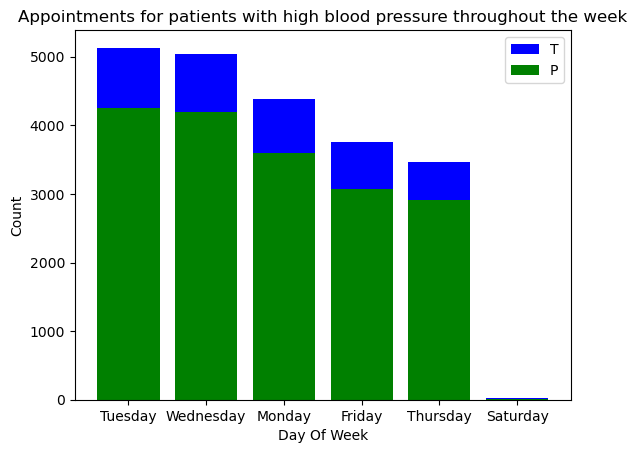

In [34]:
title = "Appointments for patients with high blood pressure throughout the week"

display_plot(hipertension_df.day_of_week.value_counts(), 'bar',color.BLUE, legend='Total Appointment')

display_plot(present_df.day_of_week.value_counts(), 'bar',color.GREEN, legend='Present', title=title)

In [35]:
#Select day with high attendance
selected_days = ["Tuesday", "Wednesday"]
# Apply filter
filtered_data = present_df[present_df['day_of_week'].isin(selected_days)]
# # Apply mode to get most common neighbourhood that appears in set of data.
filtered_data.neighbourhood.mode()

0    JARDIM DA PENHA
Name: neighbourhood, dtype: object

<a id='conclusions'></a>
<h2 class="text-bg-primary p-2">Conclusions</h2>


In this report I have conducted two research questions, and the following result can be found below:

1-	Research Finding for Question 1 (What factors contribute to patients not attending their scheduled appointments at the hospital?)

<br>Findings:
-	67.7% of absent patients did not receive text messages to reminding them of their appointments.
-	The highest days of absence are the 13th and 16th - 20th
-	The top neighbourhoods where patients did not receive SMS were Caratuera, Gorica, Ilha do Principe, Andorinhas and Bonfim

<br>Limitaion:
-	Appointment time, although some patients attended their scheduled appointments without receiving text messages. There are some patients who received text messages for their next appointment and did not show up. Such a scenario might be that the timing of their scheduled appointments does not fit into their schedule. This data set only provides access to the day of the appointment, not the time of the appointment


2-	Research Finding for Question 2 (Which neighbour has the highest attendance for a patient with hypertension?)

<br>Findings:
-	JARDIM DA PENHA has the highest attendance.
-	The highest days are 2, 3 and 6.
-	The highest day of the week is Tuesday, and Wednesday.